In [1]:
import matplotlib.pyplot as plt
from functools import partial
import pandas as pd
import numpy as np

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [7]:
def add_path(file_, path):
  '''
  add the images folder to the file name

  Args:
    file_ (str) --> file that is inside the folder
    path (str) --> folder that contains the files
  
  Returns:
    filepath (str) --> file with destination path
  '''

  return path + file_

In [ ]:
!cp /content/drive/MyDrive/datasets-projeto/chexpert-v10-small.zip /content/
!unzip /content/chexpert-v10-small.zip

In [195]:
chexpert_df = pd.read_csv('/content/CheXpert-v1.0-small/train.csv')
chexpert_df = chexpert_df.fillna(0)

chexpert_df = chexpert_df.drop(['Age', 'Enlarged Cardiomediastinum', 
                                'Cardiomegaly', 'Pleural Other',
                                'Fracture', 'Support Devices', 
                                'Lung Lesion', 'Consolidation',
                                'Pneumonia', 'Edema'], axis = 1)

chexpert_df = chexpert_df[chexpert_df['Frontal/Lateral'] == 'Frontal']
chexpert_df = chexpert_df[(chexpert_df['AP/PA'] == 'AP') |
                          (chexpert_df['AP/PA'] == 'PA')]
chexpert_df = chexpert_df.drop(['Frontal/Lateral', 'AP/PA'], axis = 1)

In [196]:
path = list(chexpert_df['Path'])
partial_add_path = partial(add_path, path = '/content/')
path = list(map(partial_add_path, path))
chexpert_df['Path'] = path
chexpert_df['Sex'].replace({'Female': 'female', 'Male': 'male'}, inplace = True)
chexpert_df.replace([-1.0], 0, inplace = True)

In [197]:
findings = list()
classes = list(chexpert_df.columns)[3:]

for classe in classes:
  classes_aux = classes.copy()
  classes_aux.remove(classe)
  finding = chexpert_df[(chexpert_df[classe] == 1.0) & 
                        ((chexpert_df[classes_aux[0]] == 1.0) |
                        (chexpert_df[classes_aux[1]] == 1.0) |
                        (chexpert_df[classes_aux[2]] == 1.0))]
  findings.append(finding)

for index, sub in enumerate(findings):
  if index == 0:
    chexpert_df = sub
  elif index != len(findings):
    chexpert_df = pd.concat((chexpert_df, sub))

In [198]:
chexpert_df['Dataset'] = ['CheXpert'] * len(chexpert_df)
chexpert_df['Label Type'] = ['Multilabel'] * len(chexpert_df)
chexpert_df['No Finding'] = 0.0
columns = np.concatenate((['Dataset', 'Path', 'Sex', 'Label Type', 'No Finding'], classes))
chexpert_df = chexpert_df[columns]

In [199]:
values = list()
for class_ in classes:
  values.append(list(chexpert_df[classes][class_]))

values_string = list()
for index, value in enumerate(values):
  sub_values_string = list()
  for one_value in value:
    sub_values_string.append(int(one_value) * classes[index])
  values_string.append(sub_values_string)

multilabel_string = list()
for index in range(0, len(values_string[0])):
  multilabel_string.append(values_string[0][index] + values_string[1][index] + 
                           values_string[2][index] + values_string[3][index])

chexpert_df['multilabel_ref'] = multilabel_string

Text(0.5, 1.0, 'Quantidade Total de Imagens: Base de Dados CheXpert - Multirrótulo')

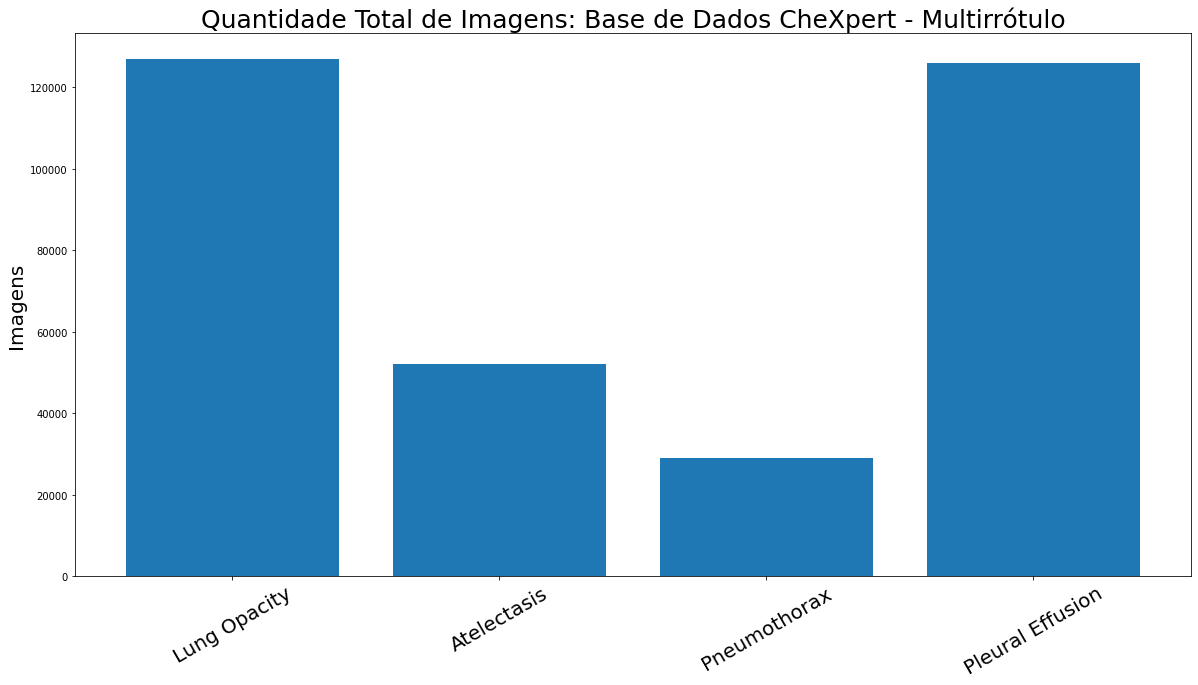

In [200]:
count_findings = list()
for finding in classes:
  count = dict(chexpert_df[finding].value_counts())[1.0]
  count_findings.append(count)

plt.figure(figsize = (20, 10))
plt.bar(classes, count_findings)
plt.xticks(rotation = 30, size = 20)
plt.ylabel('Imagens', size = 20)
plt.title('Quantidade Total de Imagens: Base de Dados CheXpert - Multirrótulo', 
          size = 25)

In [201]:
a = chexpert_df[chexpert_df['multilabel_ref'] == 'Lung OpacityPleural Effusion'].sample(int(76660*(0.03)))
b = chexpert_df[chexpert_df['multilabel_ref'] == 'Lung OpacityAtelectasisPleural Effusion'].sample(int(17274*(0.2)))
c = chexpert_df[chexpert_df['multilabel_ref'] == 'AtelectasisPleural Effusion'].sample(int(15470*(0.5)))
d = chexpert_df[chexpert_df['multilabel_ref'] == 'Lung OpacityAtelectasis'].sample(int(11422*(0.8)))
e = chexpert_df[chexpert_df['multilabel_ref'] == 'Lung OpacityPneumothoraxPleural Effusion'].sample(int(9657*(1)))
f = chexpert_df[chexpert_df['multilabel_ref'] == 'Lung OpacityPneumothorax'].sample(int(8110*(1)))
g = chexpert_df[chexpert_df['multilabel_ref'] == 'PneumothoraxPleural Effusion'].sample(int(3302*(0.8)))
h = chexpert_df[chexpert_df['multilabel_ref'] == 'AtelectasisPneumothorax'].sample(int(2114*(1)))
i = chexpert_df[chexpert_df['multilabel_ref'] == 'Lung OpacityAtelectasisPneumothorax'].sample(int(2097*(1)))
j = chexpert_df[chexpert_df['multilabel_ref'] == 'AtelectasisPneumothoraxPleural Effusion'].sample(int(1917*(1)))
k = chexpert_df[chexpert_df['multilabel_ref'] == 'Lung OpacityAtelectasisPneumothoraxPleural Effusion'].sample(int(1824*(1)))

chexpert_df_balanced = pd.concat((a, b, c, d, e, f, g, h, i , j, k))

Text(0.5, 1.0, 'Quantidade Total de Imagens: Base de Dados CheXpert - Multirrótulo')

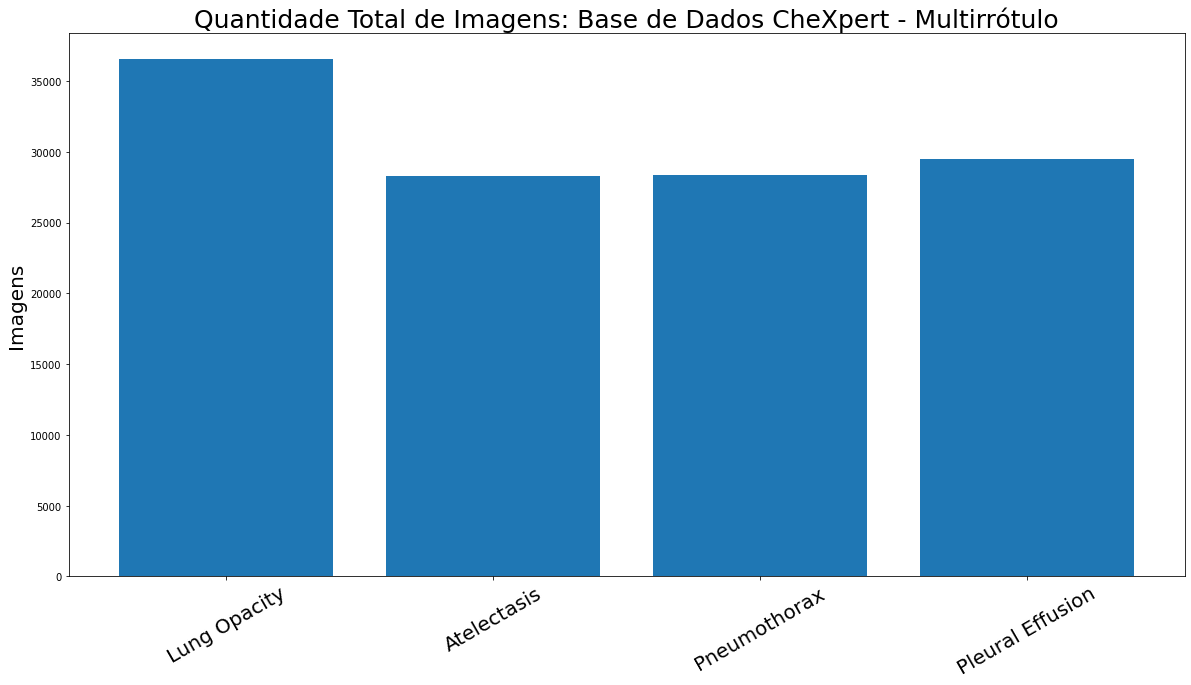

In [207]:
count_findings = list()
for finding in classes:
  count = dict(chexpert_df_balanced[finding].value_counts())[1.0]
  count_findings.append(count)

plt.figure(figsize = (20, 10))
plt.bar(classes, count_findings)
plt.xticks(rotation = 30, size = 20)
plt.ylabel('Imagens', size = 20)
plt.title('Quantidade Total de Imagens: Base de Dados CheXpert - Multirrótulo', 
          size = 25)

In [209]:
chexpert_df_balanced

,Dataset,Path,Sex,Label Type,No Finding,Lung Opacity,Atelectasis,Pneumothorax,Pleural Effusion,multilabel_ref
47629,CheXpert,/content/CheXpert-v1.0-small/train/patient1152...,female,Multilabel,0.0,1.0,0.0,0.0,1.0,Lung OpacityPleural Effusion
102350,CheXpert,/content/CheXpert-v1.0-small/train/patient2457...,male,Multilabel,0.0,1.0,0.0,0.0,1.0,Lung OpacityPleural Effusion
171711,CheXpert,/content/CheXpert-v1.0-small/train/patient4004...,female,Multilabel,0.0,1.0,0.0,0.0,1.0,Lung OpacityPleural Effusion
132865,CheXpert,/content/CheXpert-v1.0-small/train/patient3187...,male,Multilabel,0.0,1.0,0.0,0.0,1.0,Lung OpacityPleural Effusion
179979,CheXpert,/content/CheXpert-v1.0-small/train/patient4230...,male,Multilabel,0.0,1.0,0.0,0.0,1.0,Lung OpacityPleural Effusion
...,...,...,...,...,...,...,...,...,...,...
124544,CheXpert,/content/CheXpert-v1.0-small/train/patient2981...,female,Multilabel,0.0,1.0,1.0,1.0,1.0,Lung OpacityAtelectasisPneumothoraxPleural Eff...
188437,CheXpert,/content/CheXpert-v1.0-small/train/patient4496...,female,Multilabel,0.0,1.0,1.0,1.0,1.0,Lung OpacityAtelectasisPneumothoraxPleural Eff...
182718,CheXpert,/content/CheXpert-v1.0-small/train/patient4311...,male,Multilabel,0.0,1.0,1.0,1.0,1.0,Lung OpacityAtelectasisPneumothoraxPleural Eff...
152732,CheXpert,/content/CheXpert-v1.0-small/train/patient3601...,male,Multilabel,0.0,1.0,1.0,1.0,1.0,Lung OpacityAtelectasisPneumothoraxPleural Eff...


In [210]:
chexpert_df_balanced.drop('multilabel_ref', axis = 1)
chexpert_df_balanced.to_csv(path_or_buf = 'chexpert_df_multilabel.csv', columns = columns)